# <center>Heart Health Predictor</center>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'app.py', 'dataset', 'Heart Health.pptx', 'heart-health-prediction.ipynb', 'logistic_regression_model.keras', 'models', 'Project Report.pdf', 'random_forest_model.pkl', 'static', 'templates']


In [4]:
# Set random seed for TensorFlow
tf.random.set_seed(42)

# Set random seed for NumPy
np.random.seed(42)

In [5]:
filepath = r"C:\Users\KIIT\Desktop\My learning\PROJECTS\Heart_disease_prediction\dataset\heart.csv"
if os.path.exists(filepath):
    data = pd.read_csv(filepath)
else:
    print(f"Error: File '{filepath}' not found.")

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(303, 14)

In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data.isnull().sum().sum()

0

### So, we have no missing values

In [15]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [18]:
y = data["target"]

target
1    165
0    138
Name: count, dtype: int64


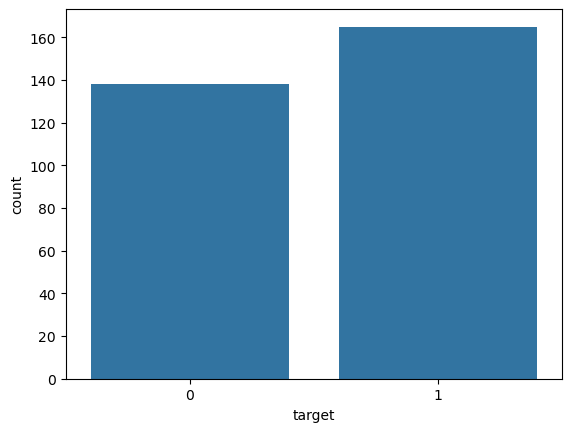

In [19]:
ax = sns.countplot(x=data["target"])
target_temp = data["target"].value_counts()
print(target_temp)


From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [22]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [23]:
data["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

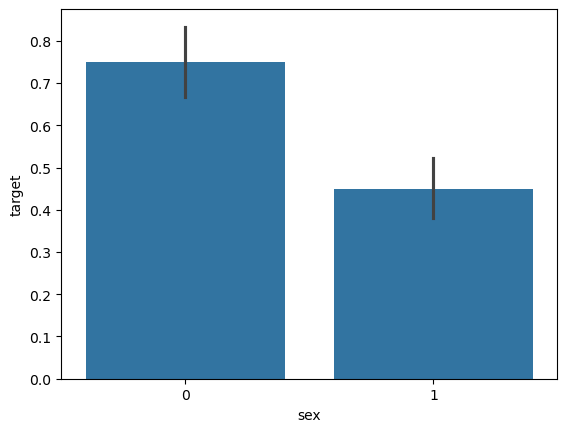

In [24]:
sns.barplot(x=data["sex"], y=data["target"])


### Here 0 is female and 1 is male patients

In [26]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [27]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [28]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [29]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


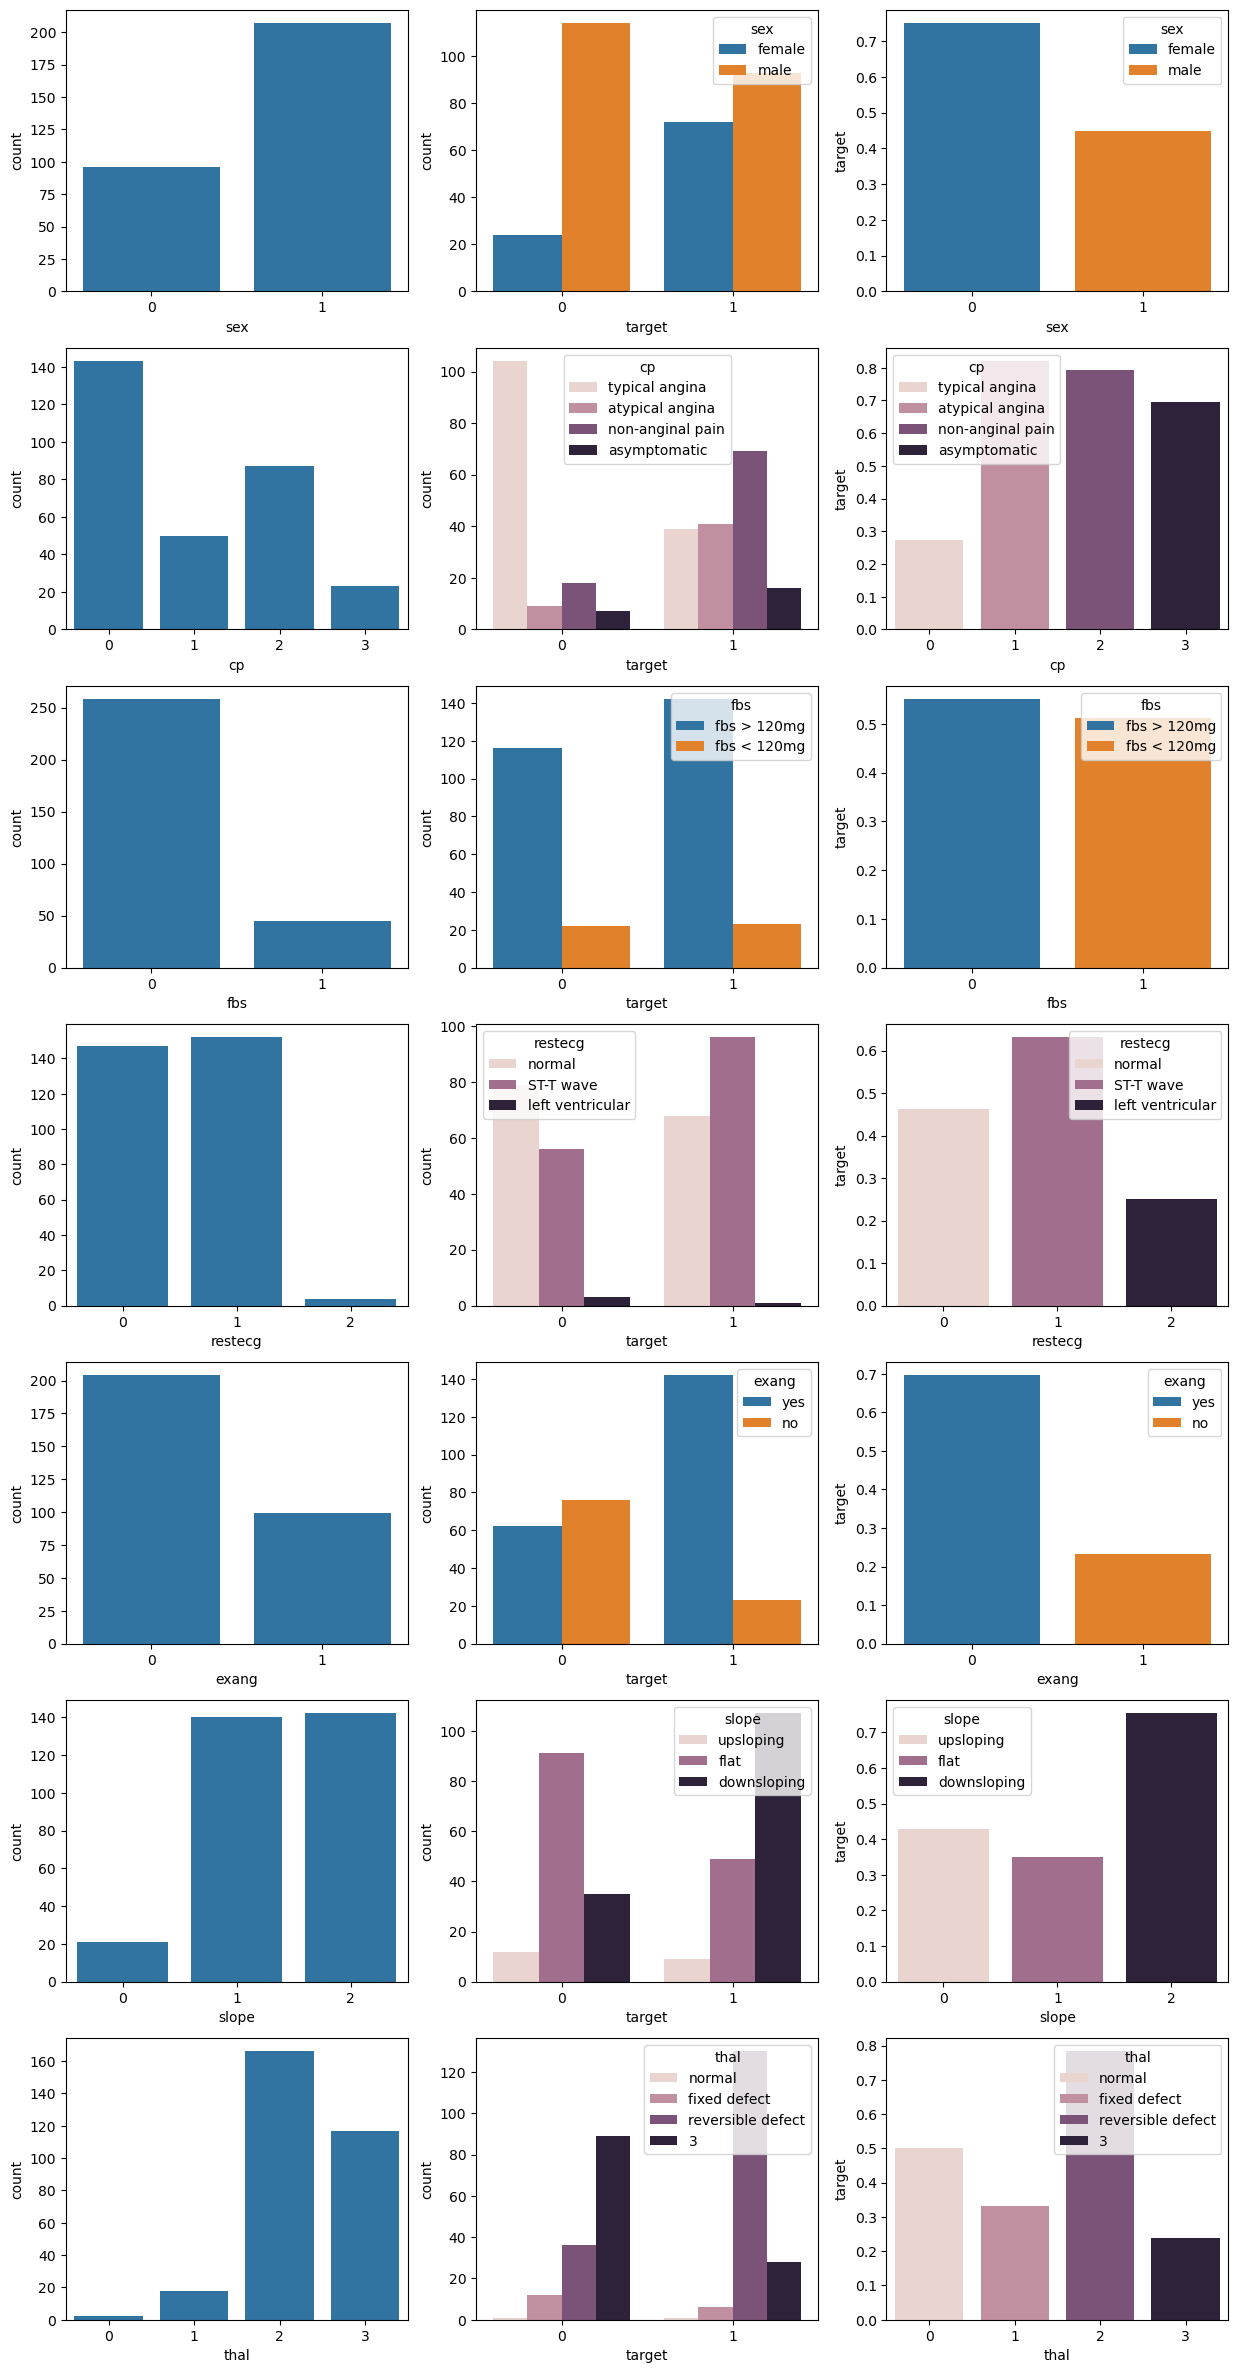

In [30]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [31]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [32]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

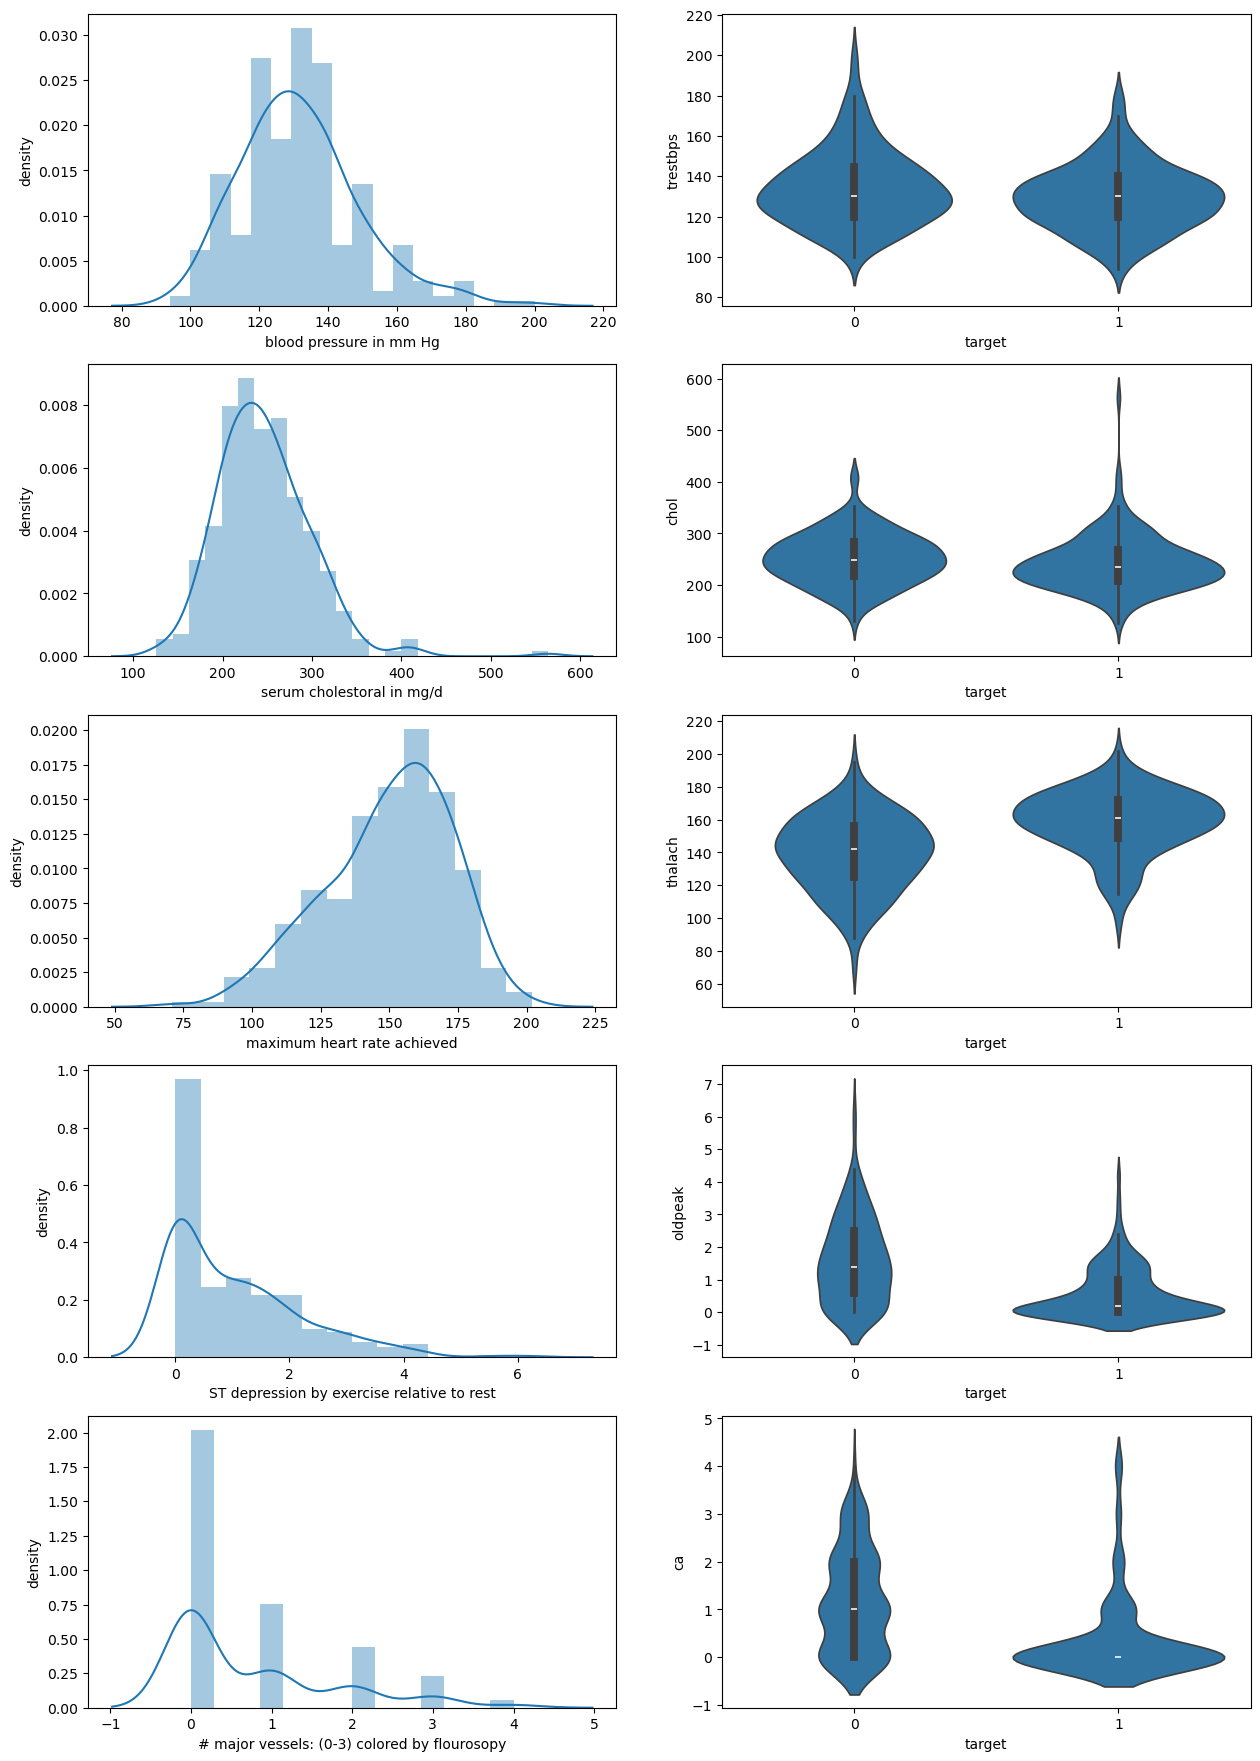

In [33]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

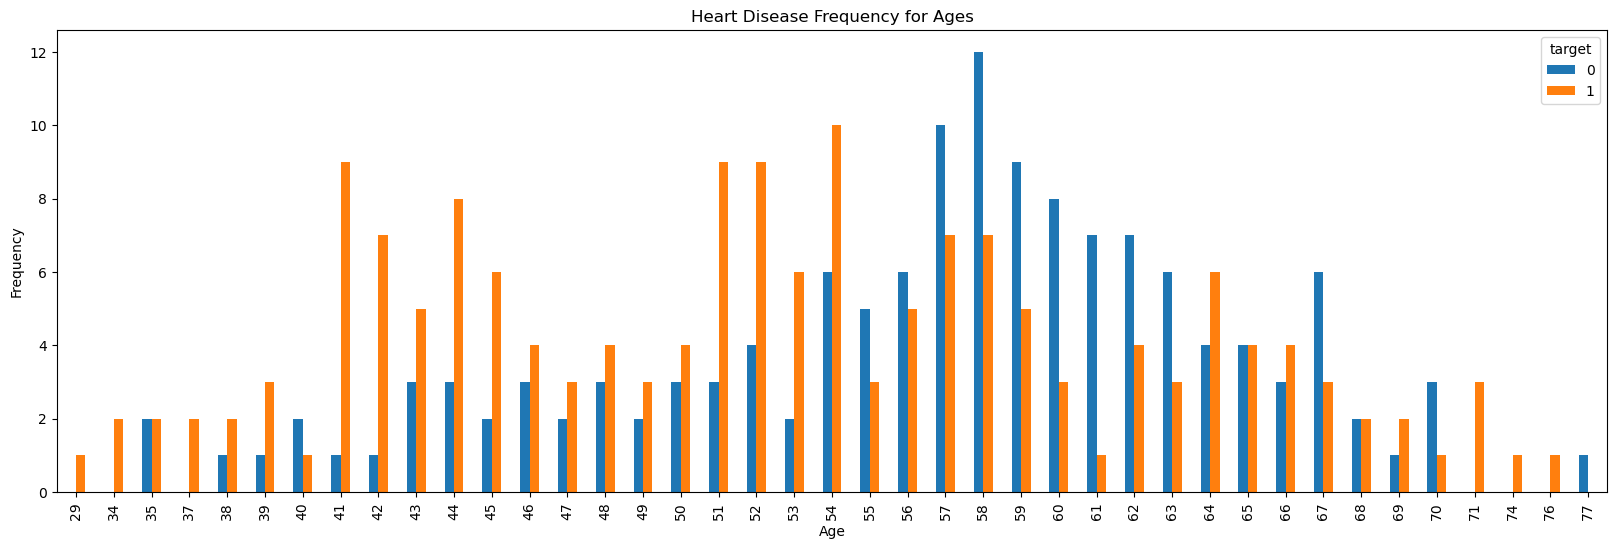

In [35]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

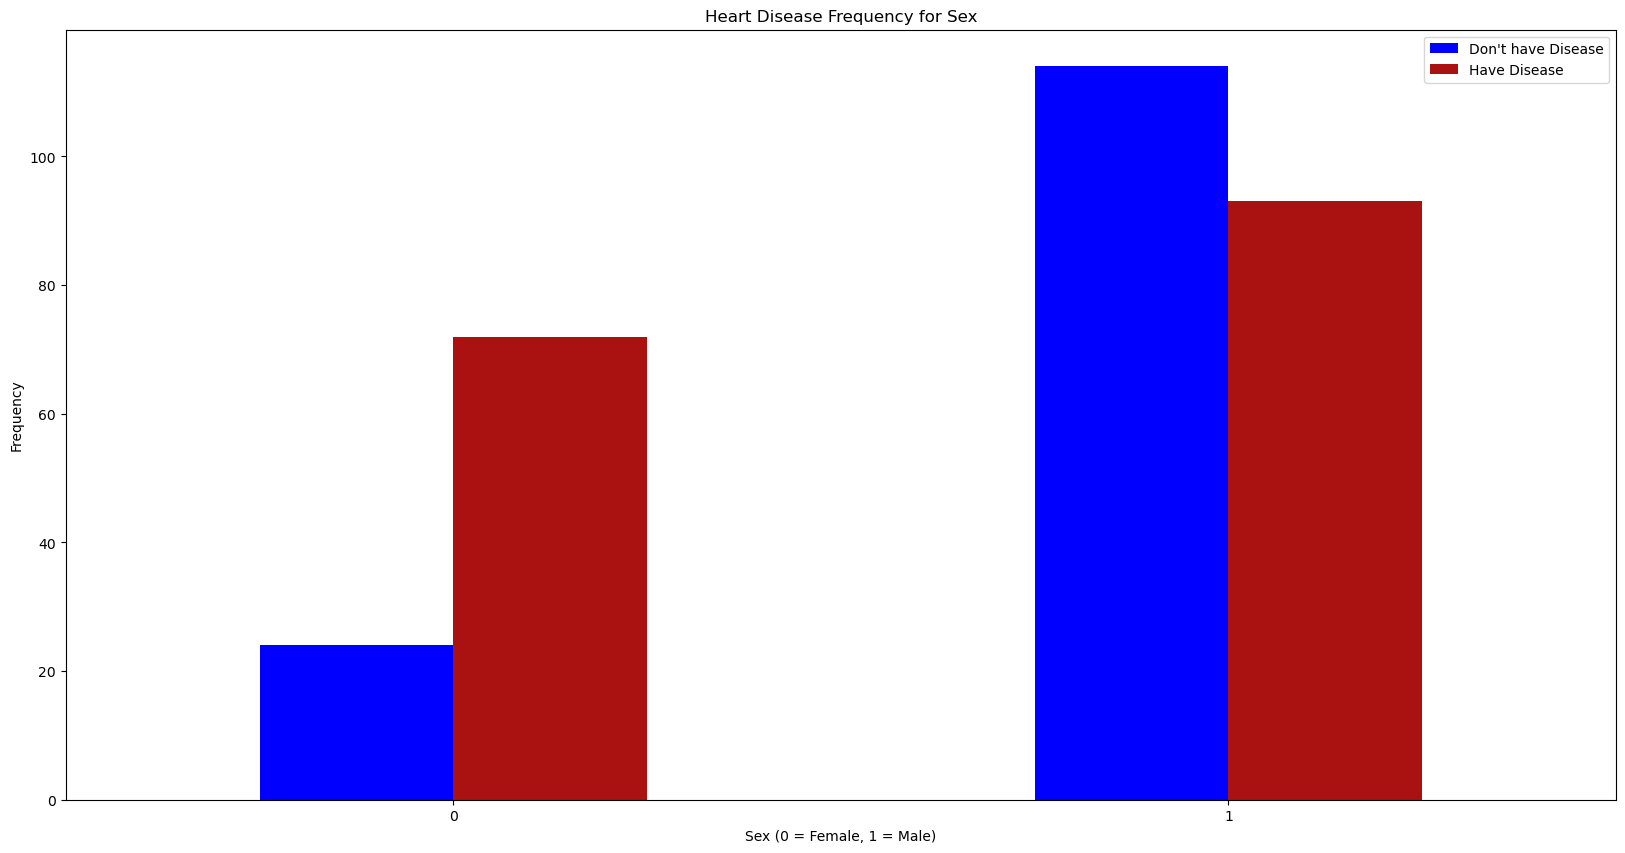

In [37]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [38]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [39]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar 

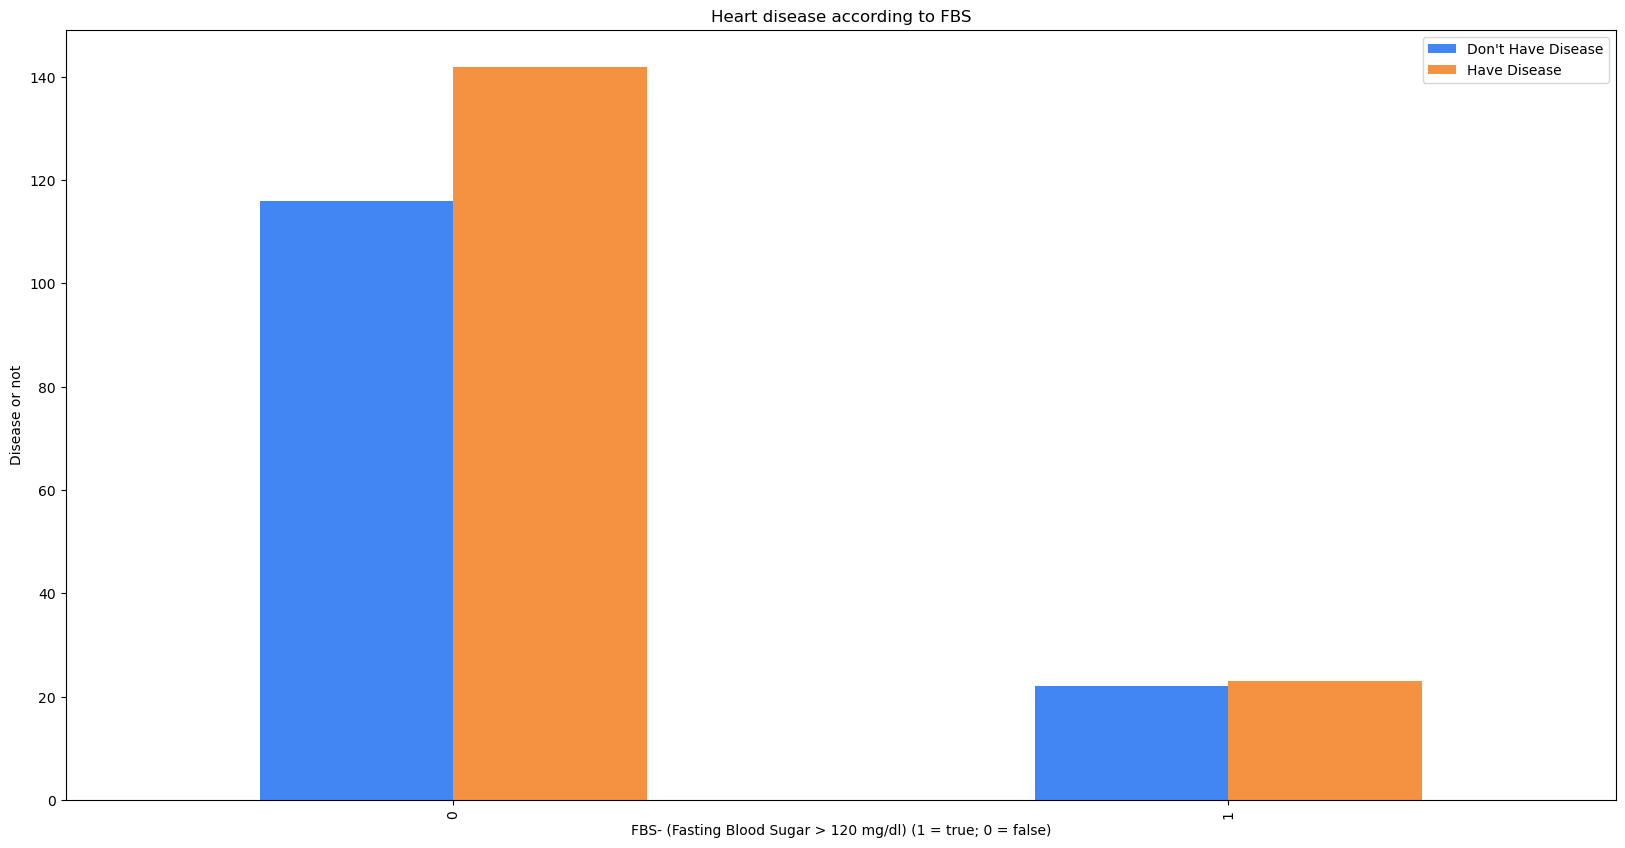

In [41]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [43]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

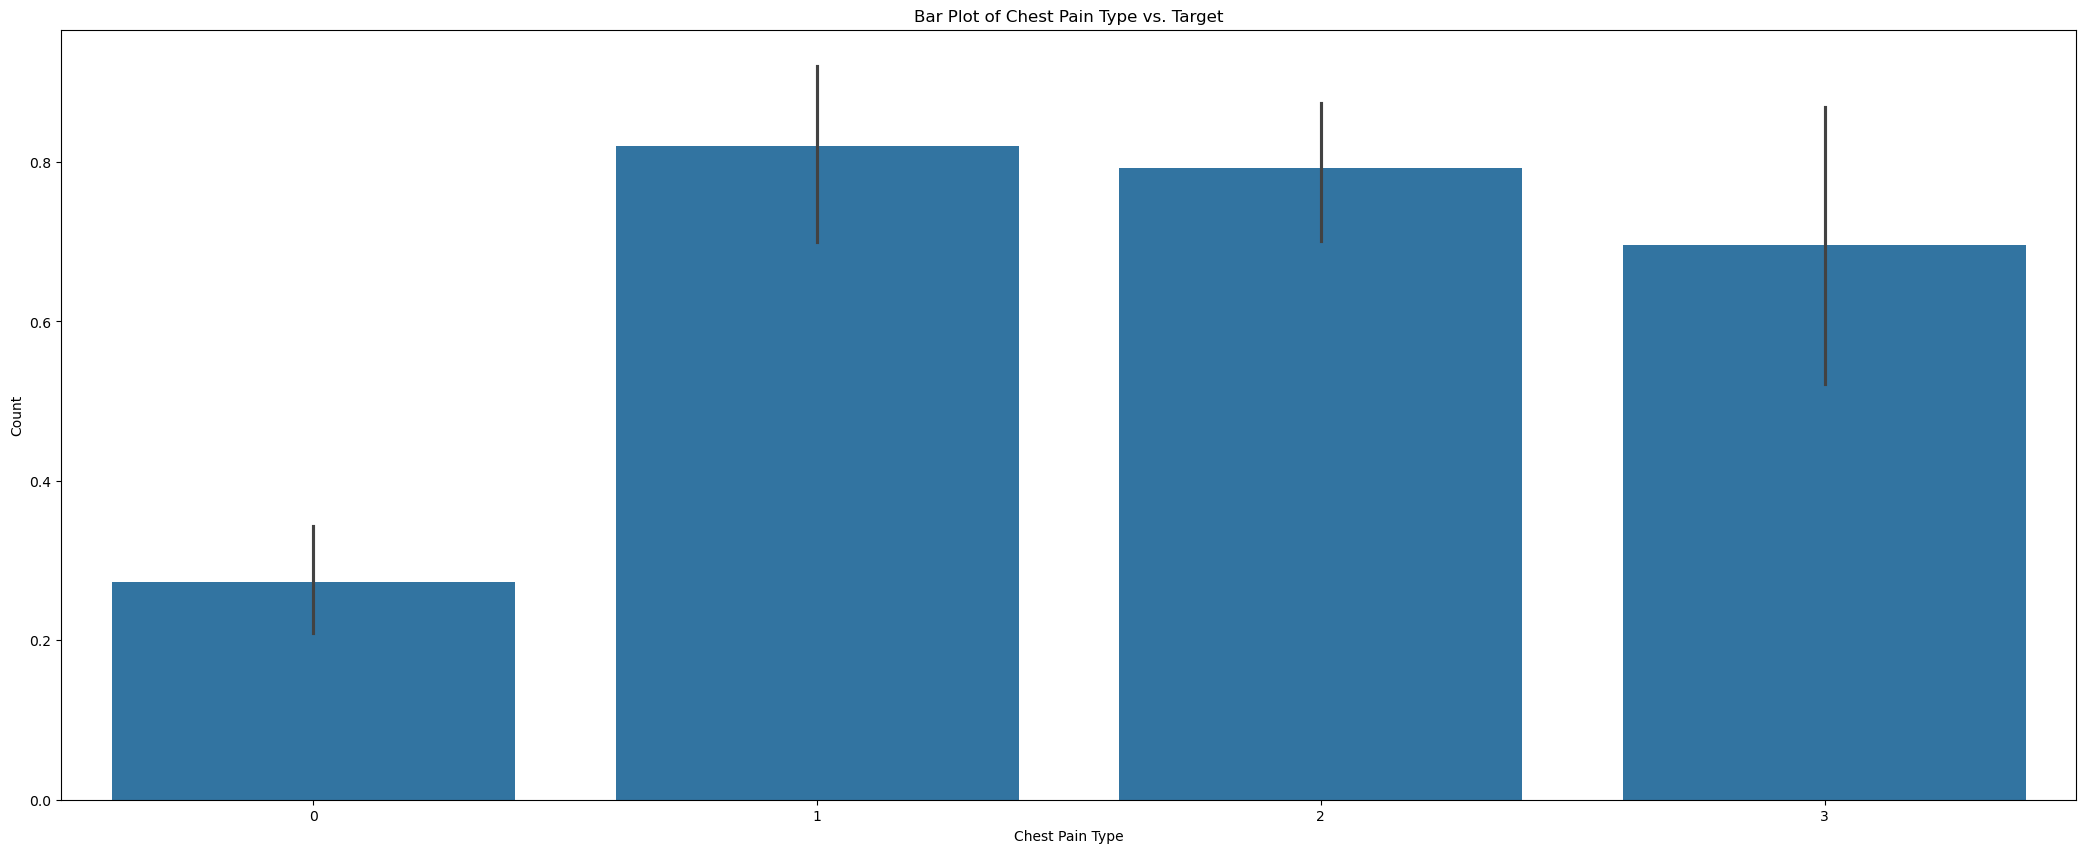

In [44]:
plt.figure(figsize=(26, 10))
sns.barplot(x=data["chest_pain_type"], y=y)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Bar Plot of Chest Pain Type vs. Target")
plt.show()


# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [46]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

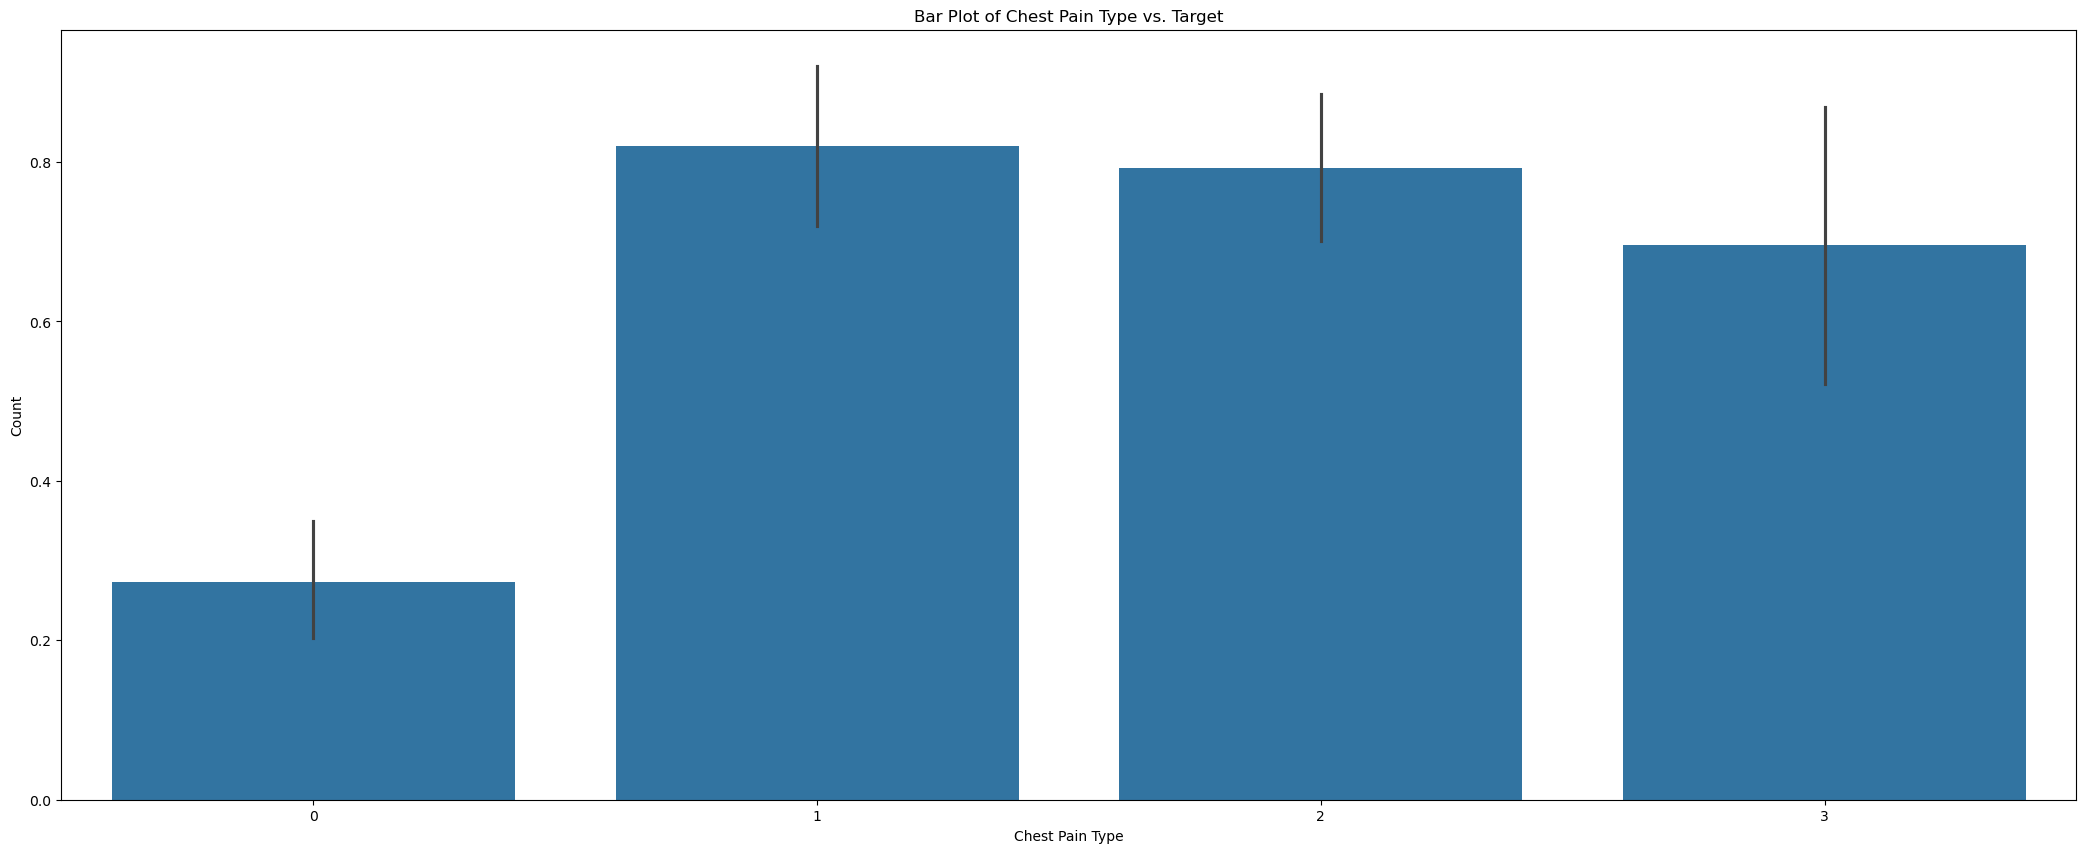

In [47]:
plt.figure(figsize=(26, 10))
sns.barplot(x=data["chest_pain_type"], y=y)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Bar Plot of Chest Pain Type vs. Target")
plt.show()


# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [49]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

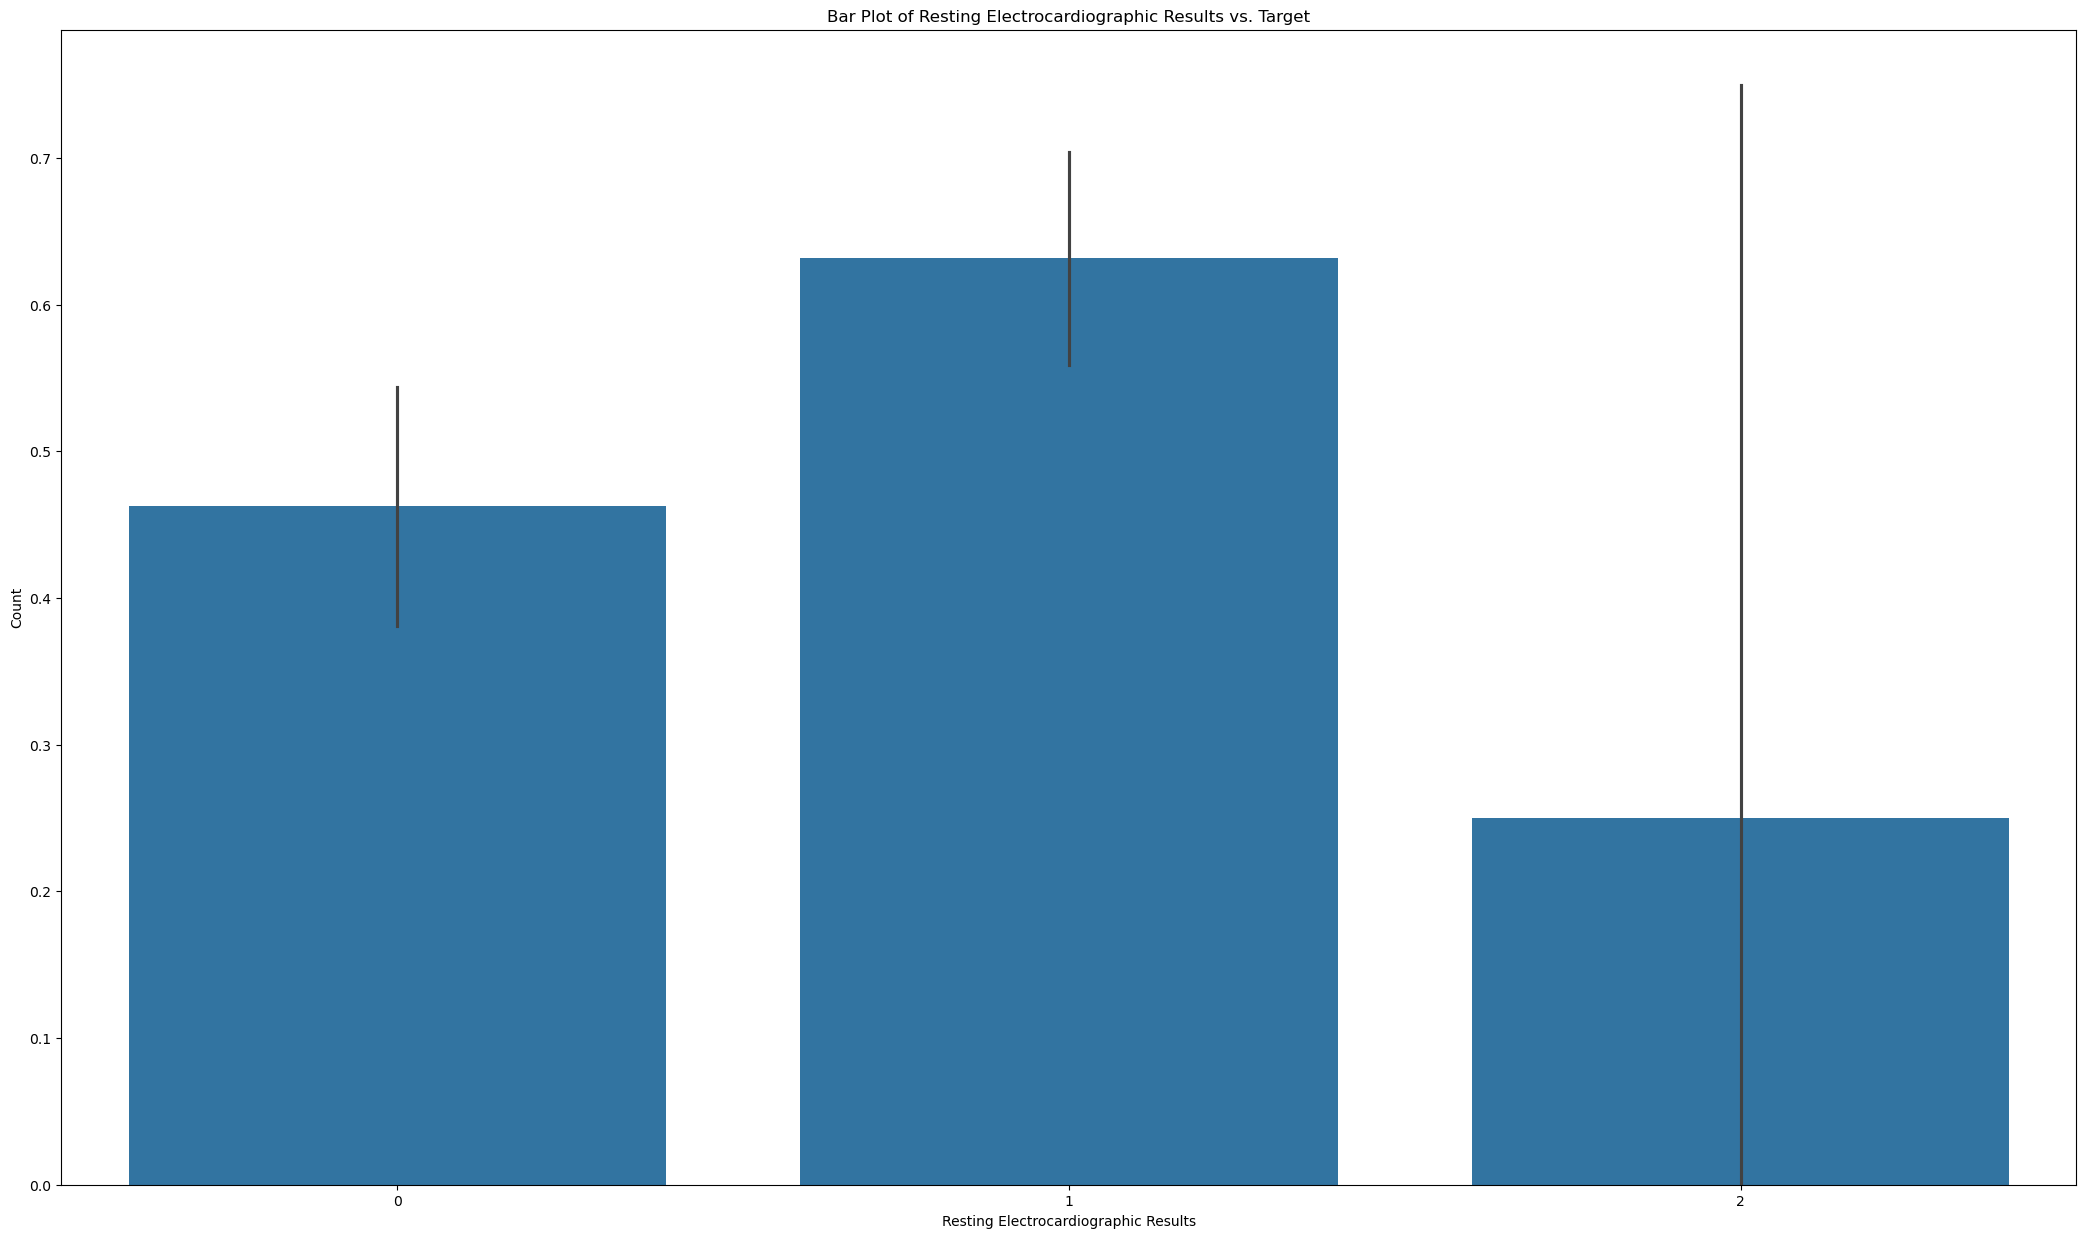

In [50]:
plt.figure(figsize=(26, 15))
sns.barplot(x=data["rest_ecg"], y=y)
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.title("Bar Plot of Resting Electrocardiographic Results vs. Target")
plt.show()

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [53]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

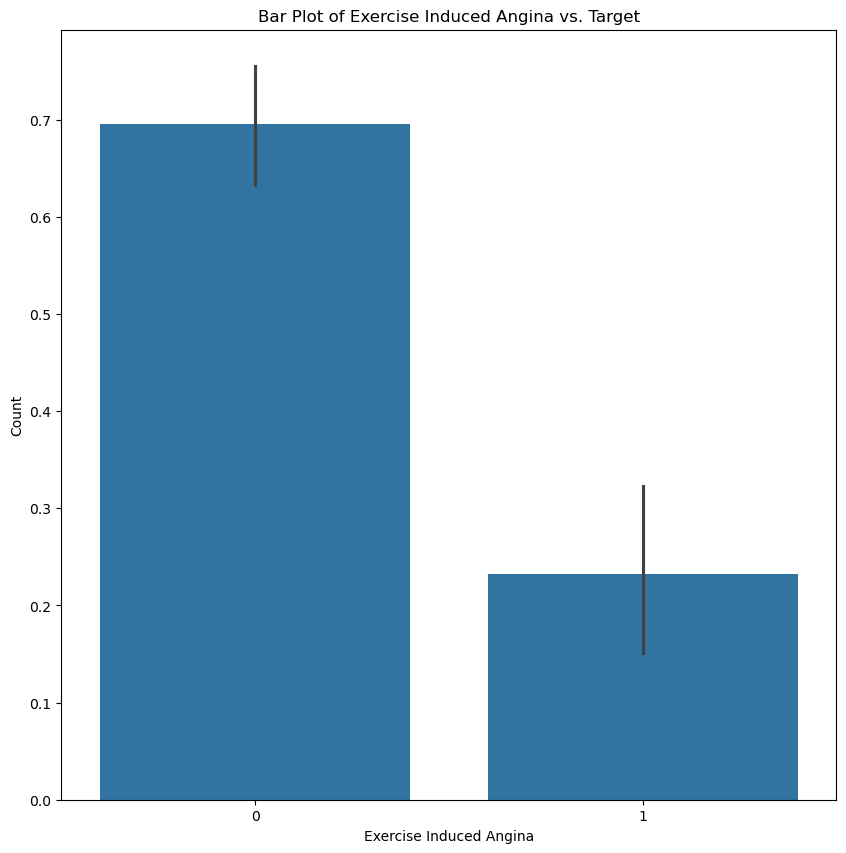

In [54]:
plt.figure(figsize=(10, 10))
sns.barplot(x=data["exercise_induced_angina"], y=y)
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.title("Bar Plot of Exercise Induced Angina vs. Target")
plt.show()

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [57]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

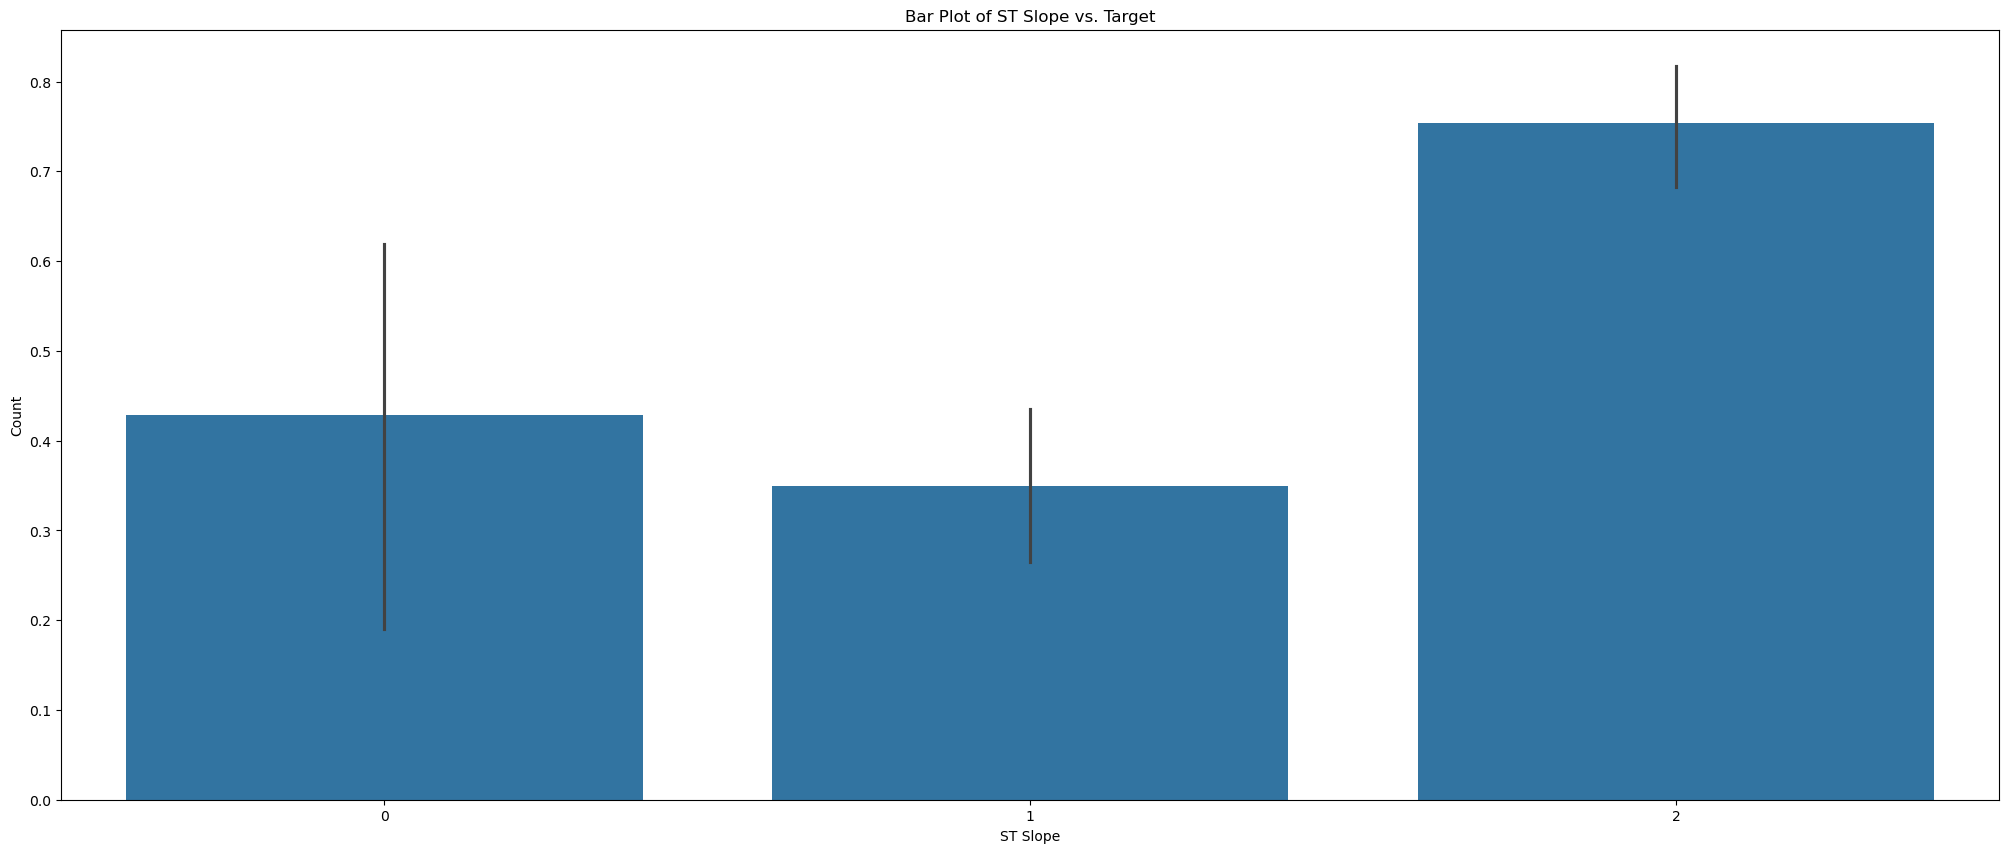

In [58]:
plt.figure(figsize=(25, 10))
sns.barplot(x=data["st_slope"], y=y)
plt.xlabel("ST Slope")
plt.ylabel("Count")
plt.title("Bar Plot of ST Slope vs. Target")
plt.show()

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [61]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

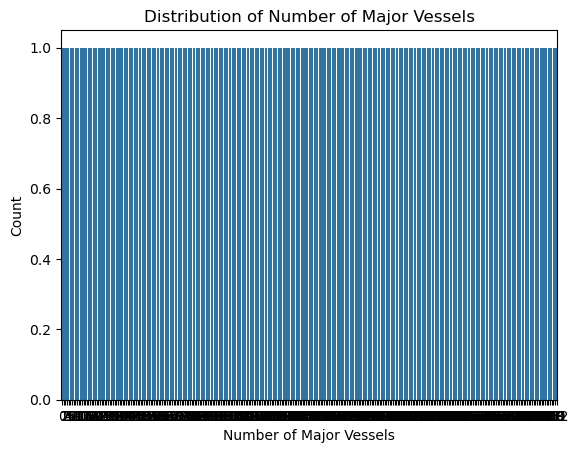

In [63]:
sns.countplot(data["num_major_vessels"])

plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Distribution of Number of Major Vessels")

plt.show()

### comparing with target

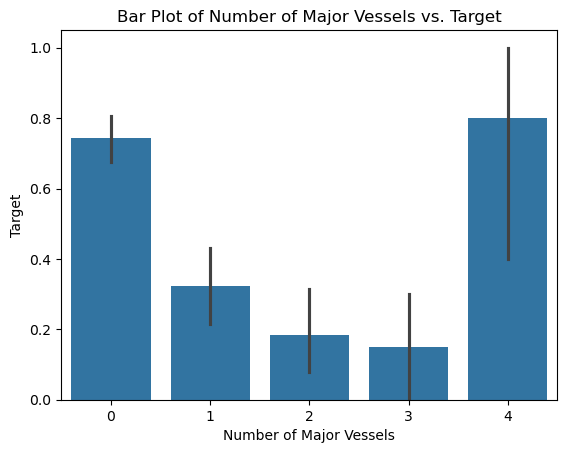

In [65]:
sns.barplot(x=data["num_major_vessels"], y=y)

# Set labels and title
plt.xlabel("Number of Major Vessels")
plt.ylabel("Target")
plt.title("Bar Plot of Number of Major Vessels vs. Target")

# Show plot
plt.show()

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [68]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

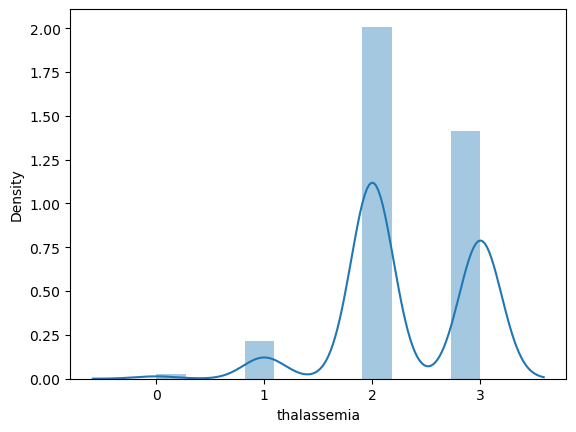

In [70]:
sns.distplot(data["thalassemia"])

### comparing with target

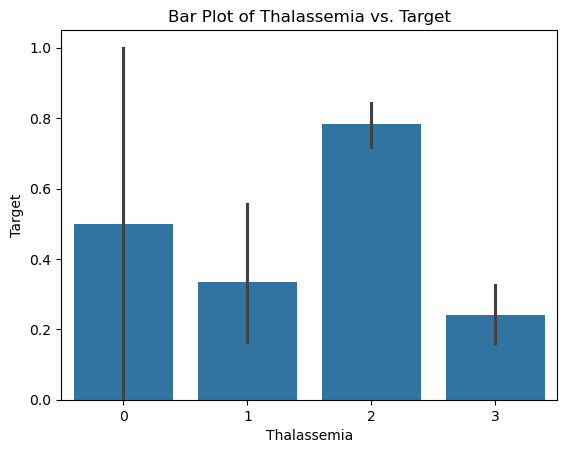

In [72]:
sns.barplot(x=data["thalassemia"], y=y)

# Set labels and title
plt.xlabel("Thalassemia")
plt.ylabel("Target")
plt.title("Bar Plot of Thalassemia vs. Target")

# Show plot
plt.show()

# thalassemia and cholesterol scatterplot

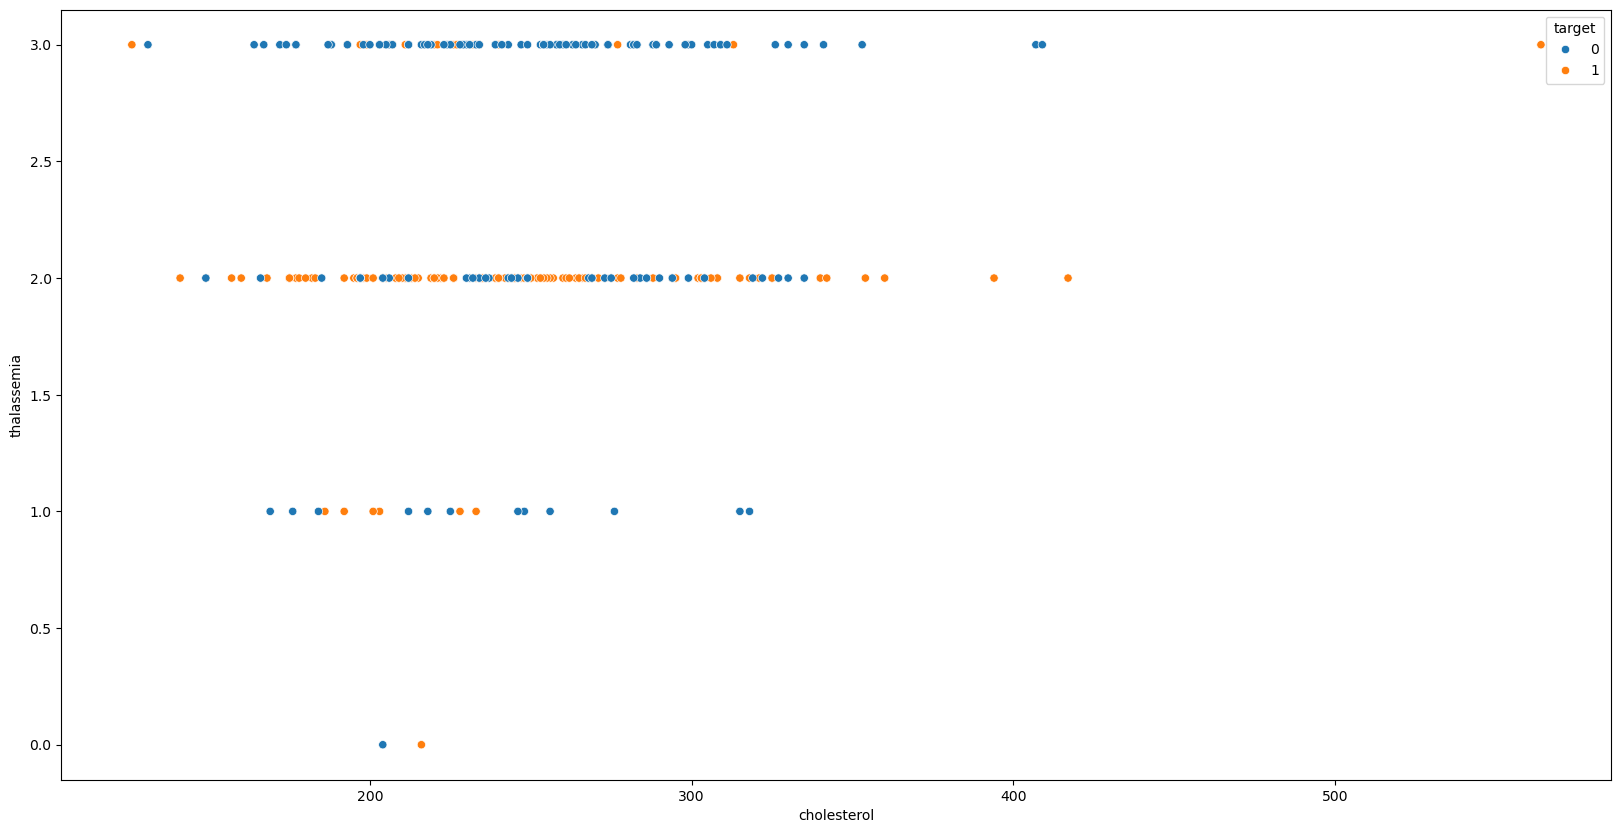

In [74]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

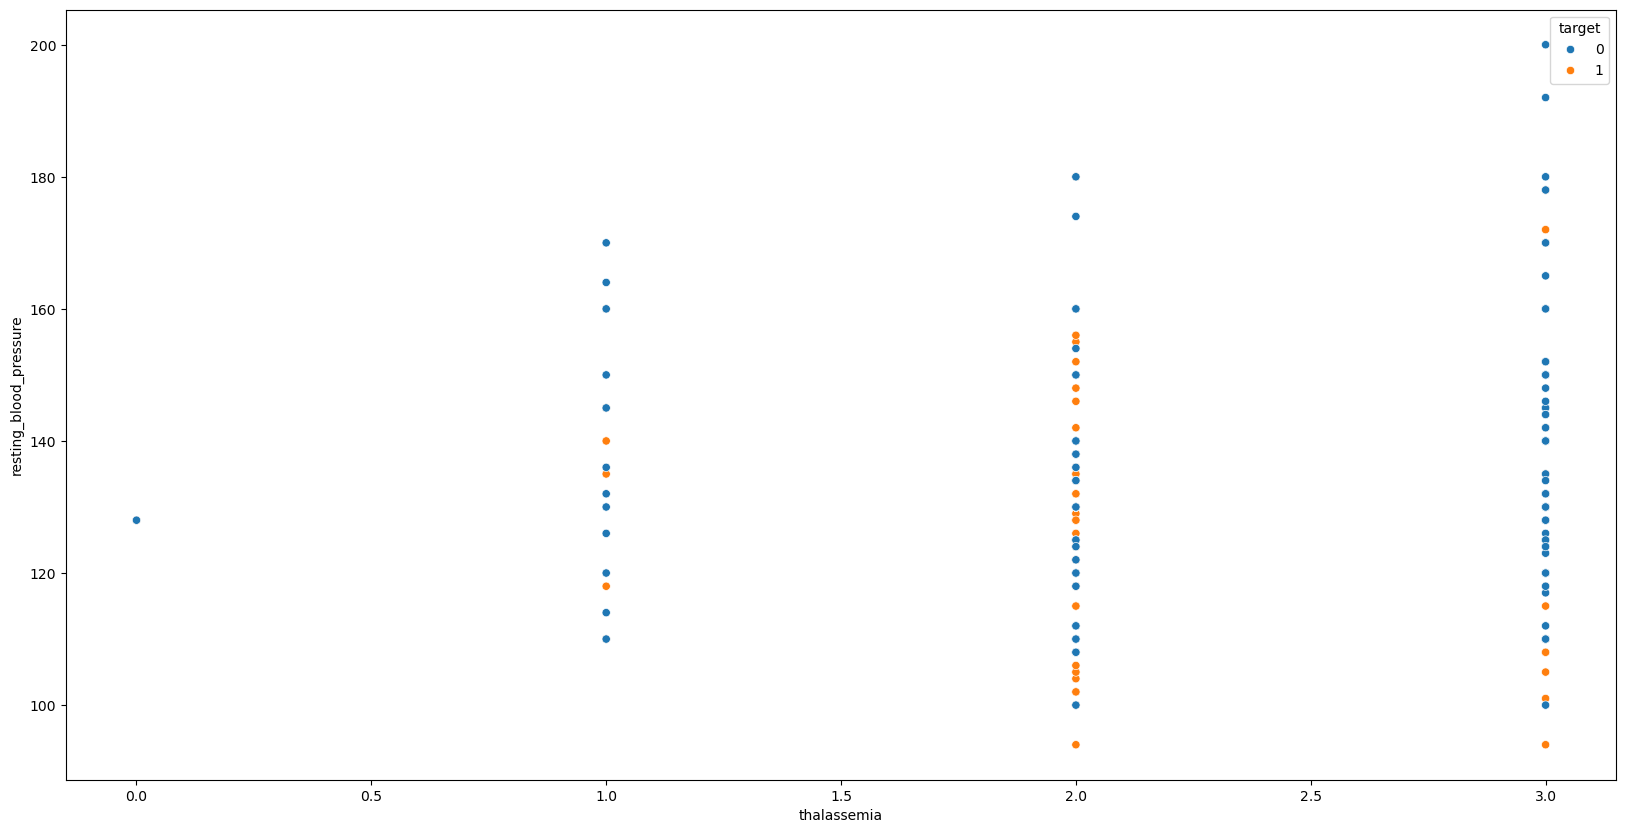

In [76]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

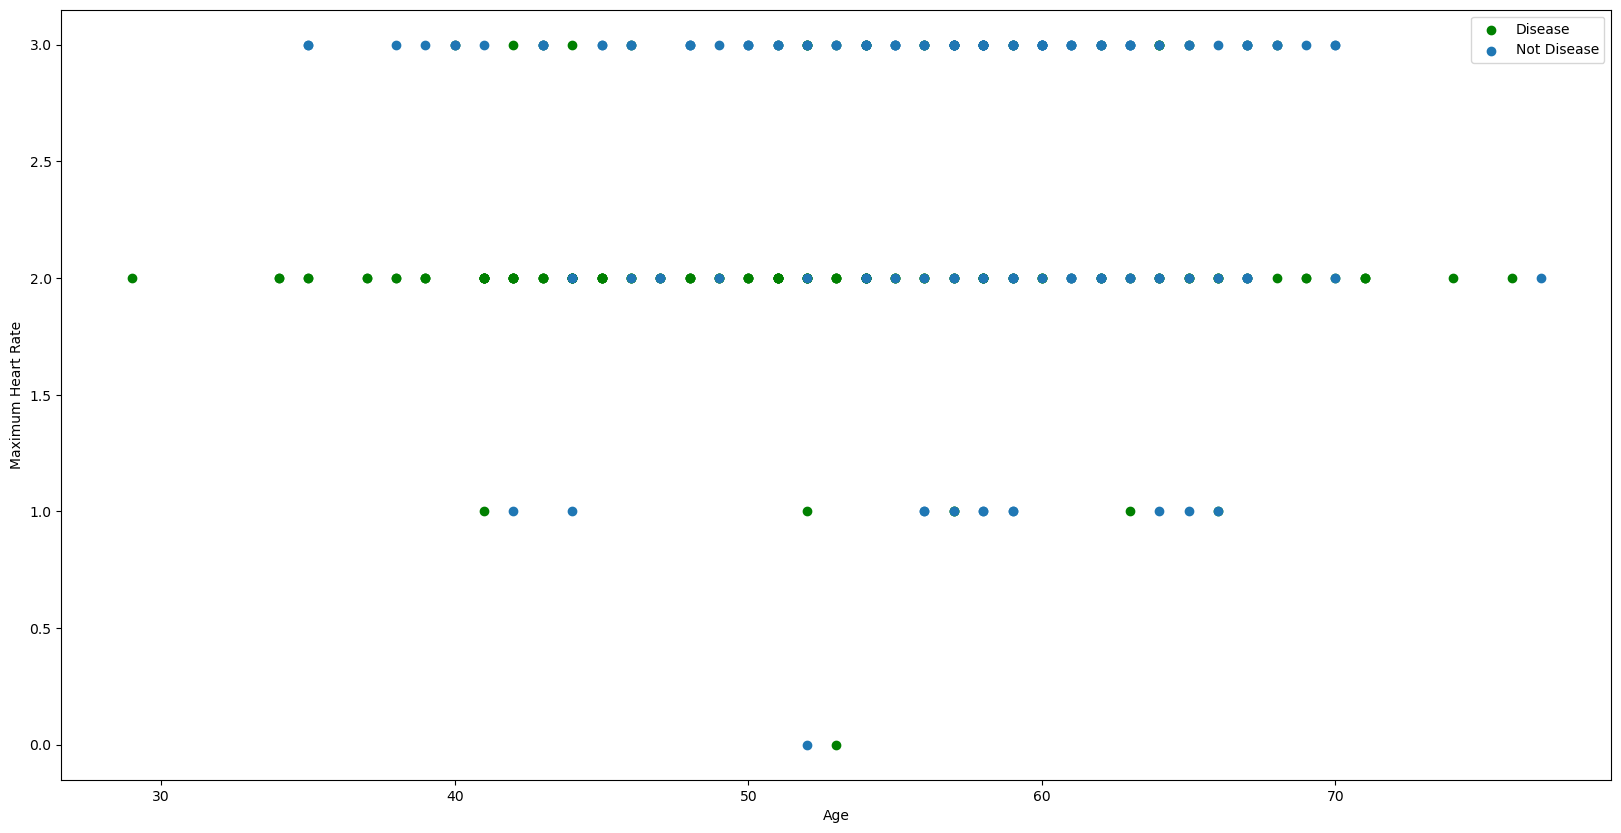

In [78]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

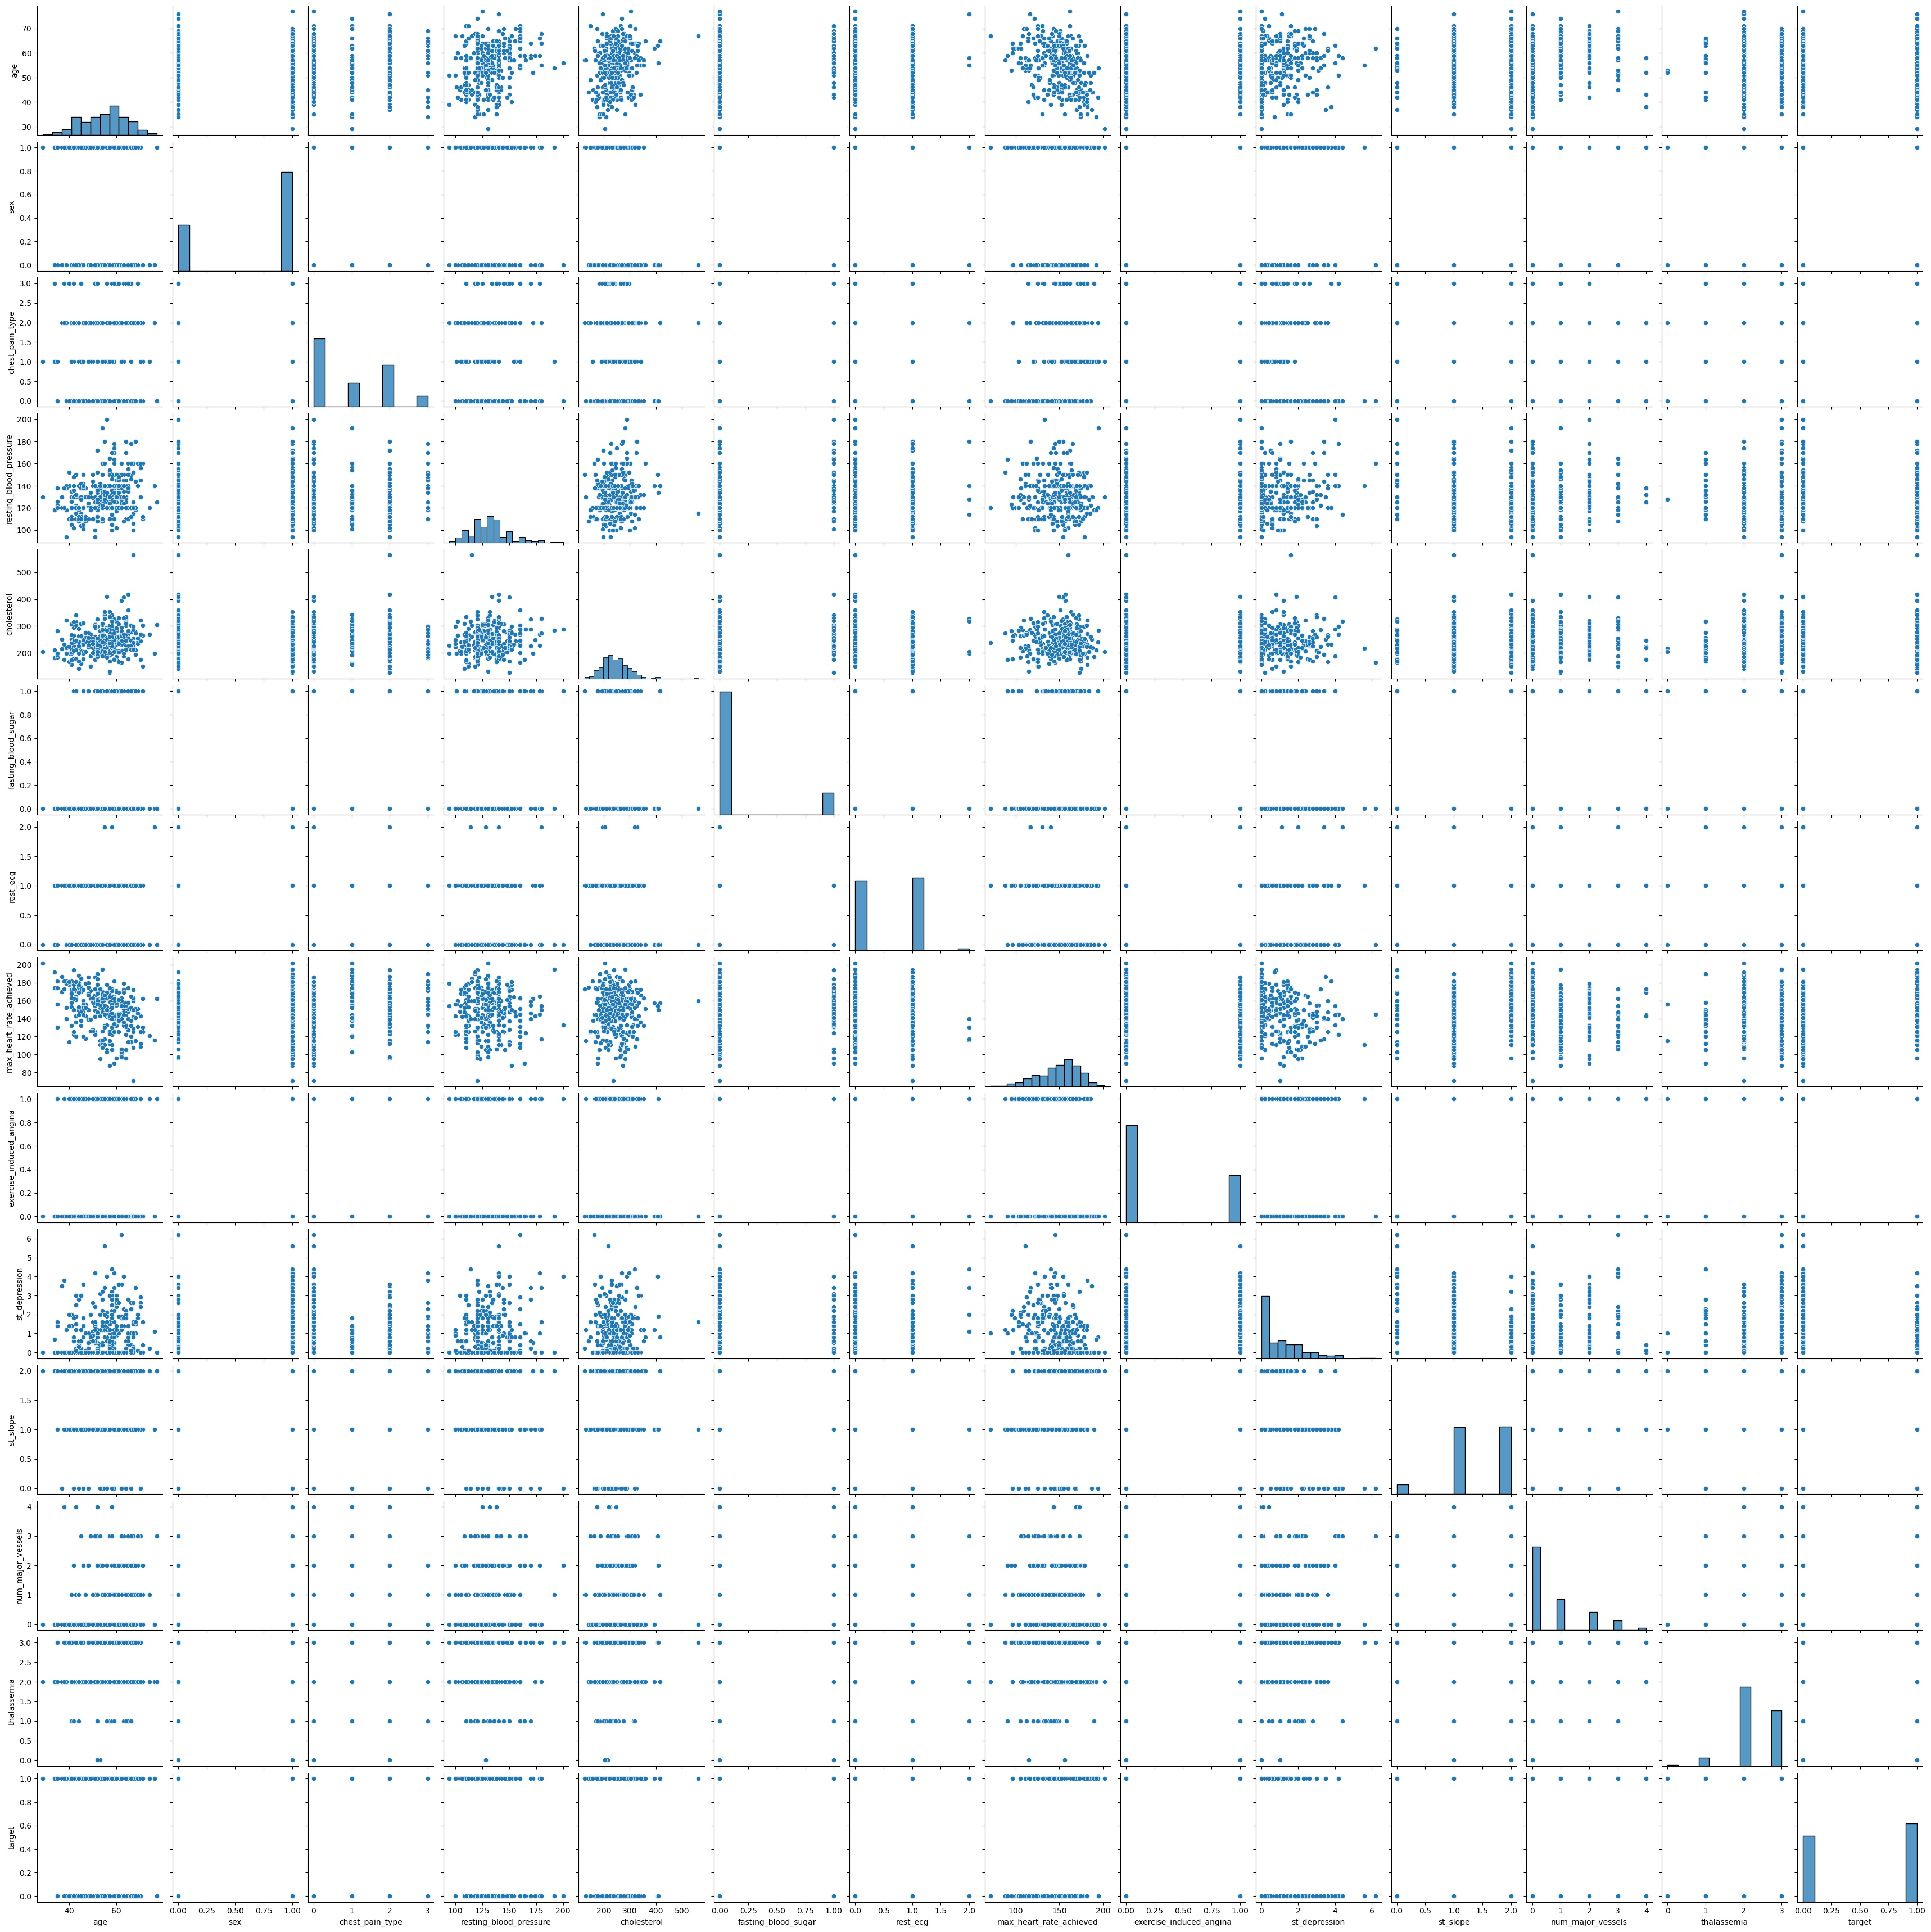

In [79]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

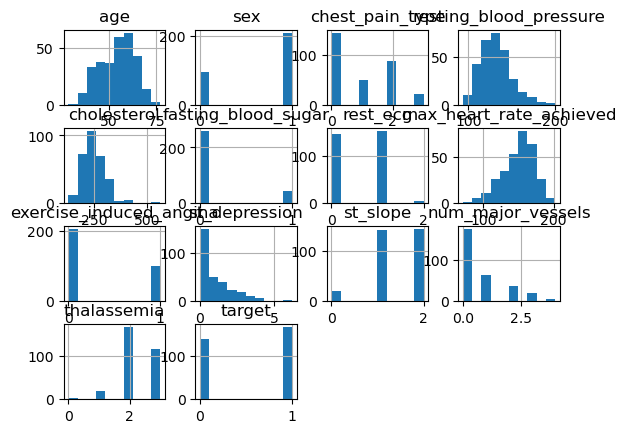

In [80]:
data.hist()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [83]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

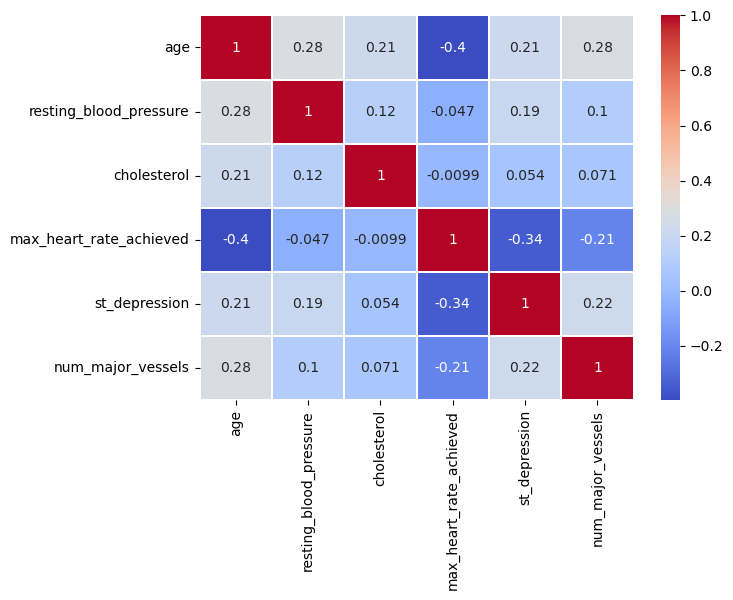

In [84]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [86]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [88]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [89]:
X_train.shape

(242, 13)

In [90]:
X_test.shape

(61, 13)

In [91]:
Y_train.shape

(242,)

In [92]:
Y_test.shape

(61,)

## importing Accuracy score

In [94]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning


In [96]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [98]:
import tensorflow as tf

# Assuming X_train and Y_train are your training data

# Defining logistic regression model with sigmoid activation
logreg = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
logreg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
logreg.fit(X_train, Y_train, epochs=250, batch_size=16)


Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4675 - loss: 29.8610   
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4675 - loss: 24.9857 
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4755 - loss: 20.1586 
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4856 - loss: 15.4566 
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5099 - loss: 11.1367
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5394 - loss: 7.8838 
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 5.9936 
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6164 - loss: 5.1023 
Epoch 9/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6211 - loss: 4.7752 
Epoch 10/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6023 - loss: 4.6794 
Epoch 11/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.6134 - loss: 4.6477
Epoch 12/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [99]:
y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.03989611]
 [0.88983315]
 [0.90357155]
 [0.01834328]
 [0.12499093]
 [0.53261447]
 [0.04524107]
 [0.12272187]
 [0.00196285]
 [0.00281443]
 [0.86750937]
 [0.91909164]
 [0.0240759 ]
 [0.86297166]
 [0.96611917]
 [0.76547945]
 [0.07931884]
 [0.8119798 ]
 [0.00473102]
 [0.95177114]
 [0.8098128 ]
 [0.30773443]
 [0.07775261]
 [0.08667775]
 [0.8809991 ]
 [0.48945644]
 [0.18293095]
 [0.340441  ]
 [0.97889155]
 [0.6234691 ]
 [0.6225395 ]
 [0.01307133]
 [0.9619721 ]
 [0.8240982 ]
 [0.9315732 ]
 [0.5658142 ]
 [0.03140016]
 [0.86062074]
 [0.07791419]
 [0.08020245]
 [0.6899214 ]
 [0.7507578 ]
 [0.36009592]
 [0.04607929]
 [0.45830163]
 [0.71206784]
 [0.8193908 ]
 [0.7424252 ]
 [0.0354327 ]
 [0.88367   ]
 [0.89550483]
 [0.5440521 ]
 [0.9770912 ]
 [0.7942545 ]
 [0.99643815]
 [0.09093997]
 [0.94770026]
 [0.9388216 ]
 [0.8072487 ]
 [0.9449941 ]
 [0.66879743]]


In [100]:
loss, accuracy = logreg.evaluate(X_test, Y_test)
print("The accuracy score achieved using Logistic Regression is: " + str(accuracy*100) + "%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8386 - loss: 0.3870 
The accuracy score achieved using Logistic Regression is: 83.60655903816223%


In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_lr_binary = np.where(y_pred_lr >= 0.5, 1, 0)
print(confusion_matrix(Y_test,y_pred_lr_binary))
print(classification_report(Y_test,y_pred_lr_binary))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr_binary))

[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Accuracy: 0.8360655737704918


# Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
matrix= confusion_matrix(Y_test, y_pred_lr_binary)

<Axes: >

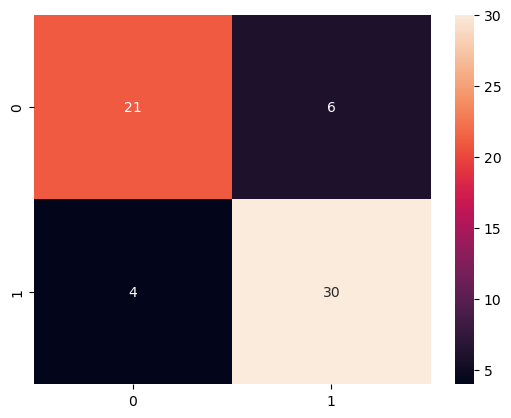

In [105]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [108]:
from sklearn.metrics import precision_score

In [109]:
precision = precision_score(Y_test, y_pred_lr_binary)

In [110]:
print("Precision: ",precision)

Precision:  0.8333333333333334


# Recall

In [112]:
from sklearn.metrics import recall_score

In [113]:
recall = recall_score(Y_test, y_pred_lr_binary)

In [114]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706




---



# F-Score

balance of precision and recall score

In [118]:
print((2*precision*recall)/(precision+recall))

0.8571428571428571


# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict_proba(X_test)[:,1]
print(y_pred_rf)

[0.1  0.44 0.5  0.   0.12 0.54 0.23 0.1  0.11 0.06 0.51 0.95 0.09 0.97
 0.95 0.75 0.24 0.77 0.04 0.57 0.88 0.21 0.28 0.27 0.59 0.43 0.18 0.45
 0.94 0.6  0.53 0.13 0.96 0.73 0.98 0.45 0.15 0.96 0.12 0.23 0.82 0.51
 0.82 0.19 0.46 0.64 0.84 0.49 0.08 0.72 0.89 0.62 0.89 0.81 0.97 0.16
 0.79 0.77 0.87 0.96 0.73]


# Learning curve for Training score & cross validation score

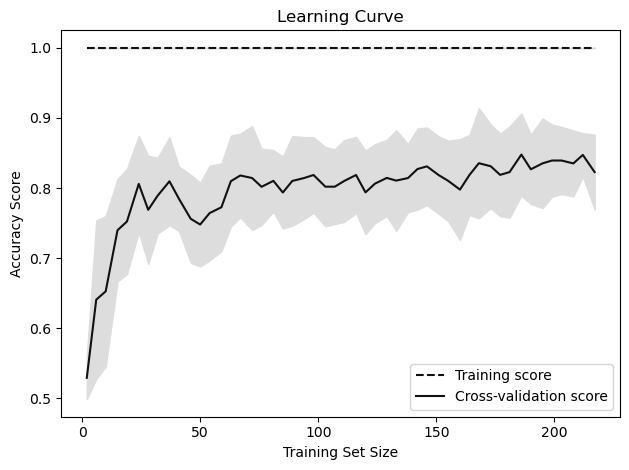

In [122]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [123]:
y_pred_rf_binary = np.where(y_pred_rf >= 0.5, 1, 0)
score_rf = round(accuracy_score(y_pred_rf_binary,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 86.89 %


In [124]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [126]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

## confusion matrix of Random Forest

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
matrix= confusion_matrix(Y_test, y_pred_rf_binary)

<Axes: >

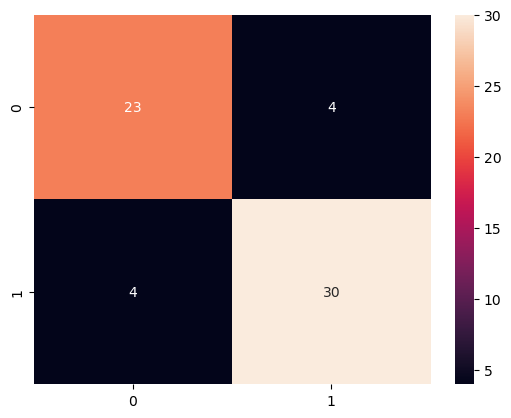

In [131]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [133]:
from sklearn.metrics import precision_score

In [134]:
precision = precision_score(Y_test, y_pred_rf_binary)

In [135]:
print("Precision: ",precision)

Precision:  0.8823529411764706


# recall

In [137]:
from sklearn.metrics import recall_score

In [138]:
recall = recall_score(Y_test, y_pred_rf_binary)

In [139]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F score

In [141]:
print((2*precision*recall)/(precision+recall))

0.8823529411764706


# Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [144]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [145]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


## confusion matrix of Naive Bayes

In [147]:
from sklearn.metrics import confusion_matrix

In [148]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

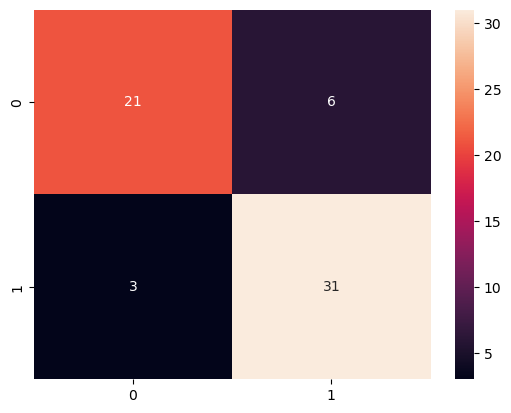

In [149]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [151]:
from sklearn.metrics import precision_score

In [152]:
precision = precision_score(Y_test, y_pred_nb)

In [153]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [155]:
from sklearn.metrics import recall_score

In [156]:
recall = recall_score(Y_test, y_pred_nb)

In [157]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [159]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


# KNN(K Nearest Neighbors)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [162]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [163]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [165]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

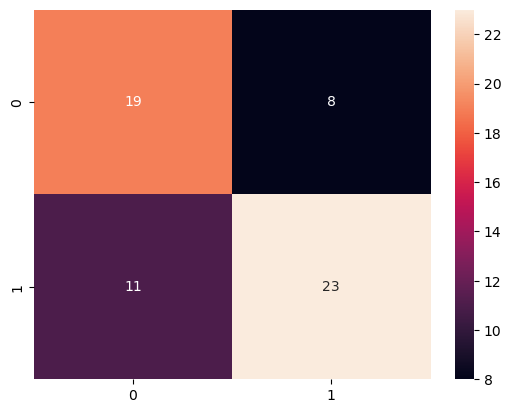

In [170]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [172]:
from sklearn.metrics import precision_score

In [173]:
precision = precision_score(Y_test, y_pred_knn)

In [174]:
print("Precision: ",precision)

Precision:  0.7419354838709677


# recall

In [176]:
from sklearn.metrics import recall_score

In [177]:
recall = recall_score(Y_test, y_pred_knn)

In [178]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [180]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


# Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [183]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [184]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [186]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


## Confusion Matrix

In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

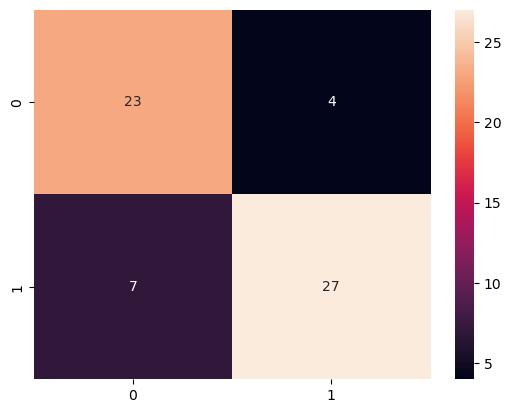

In [190]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [192]:
from sklearn.metrics import precision_score

In [193]:
precision = precision_score(Y_test, y_pred_dt)

In [194]:
print("Precision: ",precision)

Precision:  0.8709677419354839


# recall

In [196]:
from sklearn.metrics import recall_score

In [197]:
recall = recall_score(Y_test, y_pred_dt)

In [198]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


# f score

In [200]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


# Final Score

In [204]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), logreg, 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
from keras.models import Sequential
accuracy = []
for model in models:
    if isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        score = model.evaluate(X_test, Y_test)  # Evaluate the model on the test data
        accuracy.append(score[1])  # Assuming the accuracy is the second element in the evaluation results
    else:  # For non-Keras models (e.g., scikit-learn models)
        model.fit(X_train, Y_train)
        score = model.score(X_test, Y_test)
        accuracy.append(score)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8386 - loss: 0.3870 


In [206]:
# Create a DataFrame from evaluation metrics
summary = pd.DataFrame(metrics, index=classifiers)
summary

,Accuracy,Precision,Recall,F1_score
KNN,0.688525,0.693866,0.688525,0.689533
Decision Trees,0.819672,0.824802,0.819672,0.820256
Logistic Regression,0.836066,0.836284,0.836066,0.835255
Naive Bayes,0.852459,0.854287,0.852459,0.851237
Random Forests,0.885246,0.886098,0.885246,0.885433


In [208]:
## import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Collect input from the user for all 13 features
age = float(input("Enter age: "))
sex = float(input("Enter sex (0 for female, 1 for male): "))
cp = float(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure (mm Hg): "))
chol = float(input("Enter serum cholesterol (mg/dl): "))
fbs = float(input("Enter fasting blood sugar (> 120 mg/dl) (0 for false, 1 for true): "))
restecg = float(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = float(input("Enter exercise induced angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
ca = float(input("Enter number of major vessels colored by flourosopy (0-3): "))
thal = float(input("Enter thalassemia type (0-3): "))

# Create a DataFrame with the user input
user_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]
})

# Use the trained logistic regression model to make predictions
prediction = logreg.predict(user_data)

# Print the predicted target
print("Predicted target:", prediction[0])


Enter age:  63
Enter sex (0 for female, 1 for male):  1
Enter chest pain type (0-3):  3
Enter resting blood pressure (mm Hg):  145
Enter serum cholesterol (mg/dl):  233
Enter fasting blood sugar (> 120 mg/dl) (0 for false, 1 for true):  1
Enter resting electrocardiographic results (0-2):  0
Enter maximum heart rate achieved:  150
Enter exercise induced angina (0 for no, 1 for yes):  0
Enter ST depression induced by exercise relative to rest:  2.3
Enter the slope of the peak exercise ST segment (0-2):  0
Enter number of major vessels colored by flourosopy (0-3):  0
Enter thalassemia type (0-3):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted target: [0.8578758]




---



In [210]:
from keras.models import load_model

# Assuming you have already trained your logistic regression model and stored it in 'logreg' variable
# Save the model to a file
logreg.save(r'C:\Users\KIIT\Desktop\My learning\PROJECTS\Heart_disease_prediction\models\logistic_regression_model.keras')


In [212]:
# Assuming you have already trained your random forest model and stored it in 'randfor' variable
# Save the model to a file
# Assuming you have already trained your random forest model and stored it in 'randfor' variable
# Save the model to a file
import pickle
filepath = r'C:\Users\KIIT\Desktop\My learning\PROJECTS\Heart_disease_prediction\models\random_forest_model.pkl'
with open(filepath, 'wb') as f:
    pickle.dump(randfor, f)